## Load Data

In [73]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from scipy import stats
import random

In [15]:
xly = pd.read_csv('xly_data.csv')
xly.set_index('Date', inplace=True)
print(xly.head(3))

            Airbnb  Amazon  AutoZone  Booking  Carnival Corp  \
Date                                                           
07/03/2025  136.49  223.41   3769.26  5716.80          29.96   
07/02/2025  135.39  219.92   3685.34  5701.76          29.65   
07/01/2025  135.41  220.46   3718.59  5730.73          28.64   

            Chipotle Mexican Grill  Darden Restaurants  DoorDash  DR Horton  \
Date                                                                          
07/03/2025                   57.07              220.27    238.79     131.90   
07/02/2025                   56.77              219.33    238.80     135.61   
07/01/2025                   58.24              219.60    238.01     133.90   

            Ford Motor  ...     NVR  OReilly Automotive  Ross Stores  \
Date                    ...                                            
07/03/2025       11.81  ...  7623.2               91.33       131.55   
07/02/2025       11.77  ...  7768.5               89.32       131.5

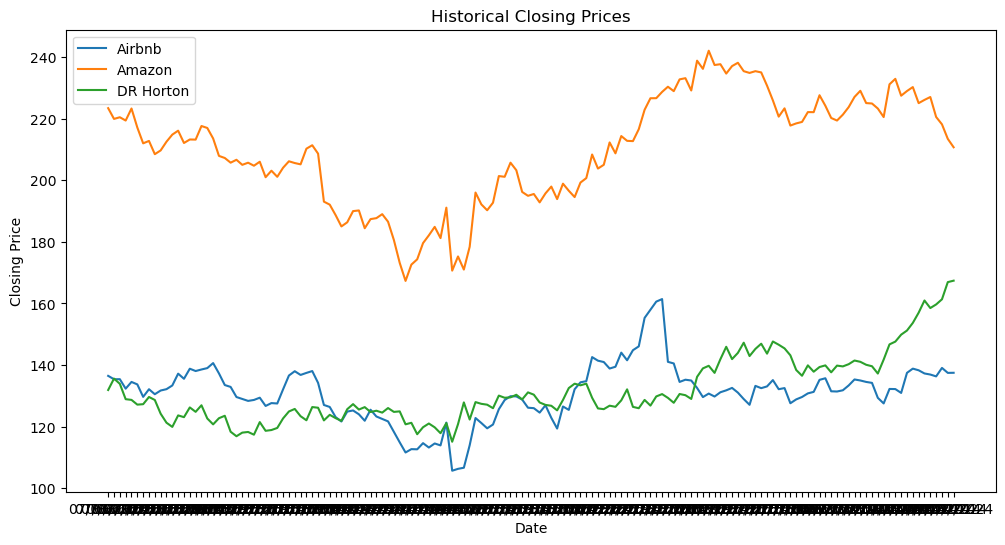

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(xly['Airbnb'], label='Airbnb')
plt.plot(xly['Amazon'], label='Amazon')
plt.plot(xly['DR Horton'], label='DR Horton')
plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Returns

 - Simple returns
 $$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100\%$$
 
$\min(R_t)=-1=-100\%$ and $\max(R_t)=+ \infty$
 
 - Continuously compounded returns
 $$r_t = \ln \left( \frac{P_t}{P_{t-1}} \right) \times 100\%$$
 
$\min(R_t)=- \infty$ and $\max(R_t)=+ \infty$

In [23]:
price_0 = 9  # price at t=0
price_1 = 10 # price at t=1

# returns for the period t=0 to t=1 will be:

Simple_ret = (price_1 - price_0) / price_0 * 100

Cont_ret = np.log(price_1 / price_0) * 100

print("The simple return at t=1 will be:", 
      "{:.4f}".format(Simple_ret), "%")
print("The continuously compounded return at t=1 will be:",
      "{:.4f}".format(Cont_ret), "%")

The simple return at t=1 will be: 11.1111 %
The continuously compounded return at t=1 will be: 10.5361 %


## Annualized Returns

If asset was held for $k$ years, then annualized (average) return is:
$$\text{Annualized } R_t[k] = \left[ \prod^{k-1}_{j=0} (1+R_{t-j}) \right]^{\frac{1}{k}} - 1$$


Geometric mean of $k$ 1-period simple gross returns is:
$$\text{Annualized } R_t[k] = \exp \left[ \frac{1}{k} \prod^{k-1}_{j=0} \ln(1+R_{t-j}) \right] - 1$$

In [76]:
#Consider investment = R100 000; between 1965 - 2014; average annual return = 21.7%
A_ret = 0.22
n_year = 30#2014 - 1965
Initial_invest = 11000

Total_ret = (1 + A_ret) ** n_year
Final_invest = Initial_invest * Total_ret
print("Your investment will be worth " + str("{:.4f}".format(Final_invest/ 10**6) ) + " millions!")

Your investment will be worth 4.2873 millions!


## Stock Moments

1) $l^{th}$ moment of continuous random variable $X$
$$m_l = \mathbb{E}[X^l] = \int^{\infty}_{-\infty} x^l f(x) dx$$

2) $l^{th}$ central moment of continuous random variable $X$
$$m_l = \mathbb{E}[(X-\mu_x)^l] = \int^{\infty}_{-\infty} (x-\mu_x)^l f(x) dx$$

- First moment is mean or expectation of $X$, denoted $\mu_x$

- Second moment is standard deviation of $X$, denoted $\sigma^2_x$

- Third central moment is skewness of $X$, denoted $S(X)$, which measures symmetry of $X$ with respect to its mean.

$$S(X) = \frac{\mathbb{E}[(X-\mu_n)^3]}{(\mathbb{E}[(X-\mu_n)^2])^{\frac{3}{2}}}$$

- Fourth central moment is kurtosis of $X$, denoted $K(X)$, which measures tail behaviour of $X$.

$$K(X) = \frac{\mathbb{E}[(X-\mu_n)^4]}{(\mathbb{E}[(X-\mu_n)^2])^{2}}$$

NB: $K(x) -3$ is called excess kurtosis!

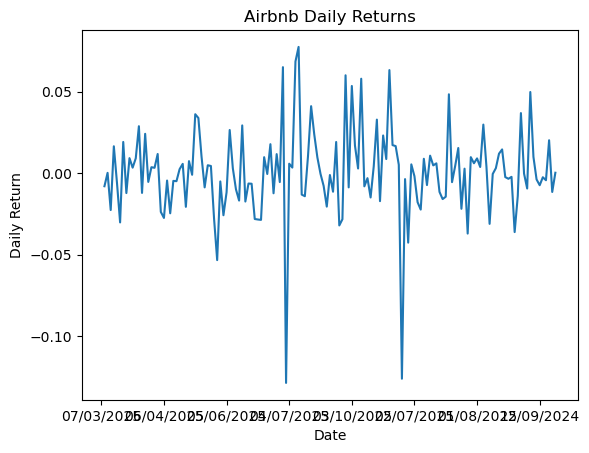

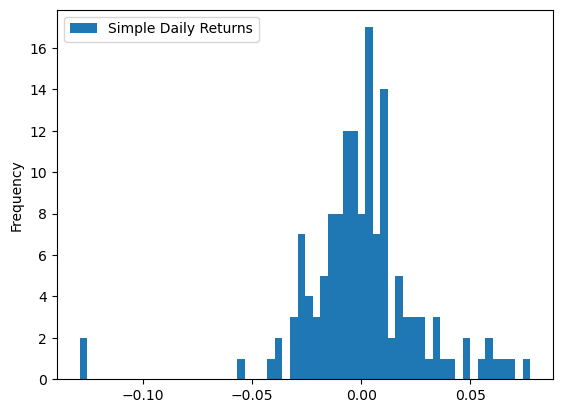

In [33]:
bnb_daily_returns = (xly['Airbnb'] / xly['Airbnb'].shift(1)) - 1

bnb_daily_returns_frame = bnb_daily_returns.to_frame()
bnb_daily_returns_frame.columns = ["Simple Daily Returns"]

bnb_daily_returns_frame["Simple Daily Returns"].plot()
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Airbnb Daily Returns")

bnb_daily_returns_frame.plot.hist(bins=60)

plt.show()

In [36]:
avg_returns_daily = bnb_daily_returns.mean()
std_returns_daily = bnb_daily_returns.std()

array_bnb = bnb_daily_returns.to_numpy()

kurt = kurtosis(array_bnb[1:])
sk = skew(array_bnb[1:])

print("The mean of the distribution is = " + str(avg_returns_daily))
print("The std. deviation (volatility) is = " + str(std_returns_daily))

print("Kurtosis = " + str(kurt))
print("Skew = " + str(sk))

The mean of the distribution is = 0.0004238724077157951
The std. deviation (volatility) is = 0.027180701846694754
Kurtosis = 6.072729007713043
Skew = -0.8445408540835859


## Jarque Bera Test (Normality Test)

Checks whether the sample data has the skewness and kurtosis that match a normal distribution.

$H_0:$ Data follows normal distribution
$H_1:$ Data does not follows normal distribution

If p-value > significance level (i.e. 0.01, 0.05 or 0.1), cannot reject $H_0$

In [39]:
# Remove NaN values
bnb_ret = bnb_daily_returns_frame.dropna()

# Then, we perform the test
jb_bnb = stats.jarque_bera(bnb_ret)
jb_bnb

SignificanceResult(statistic=240.04166748365563, pvalue=7.509554828509819e-53)

## T-distribution and T-test

Outliers from heavy tail (high kurtosis) stock return distribution resembles Student's t-distribution.

The T-distribution is symmetric and bell-shaped, like the normal distribution, but has heavier tails.

### One-Sample T-Test

Checks whether the mean of a normally-distributed sample is different from a pre-specified value:

$H_0$: Sample mean = $\mu_0$

$H_1$: Sample mean $\ne$ $\mu_0$

In [40]:
stats.ttest_1samp(bnb_ret, popmean=0)

TtestResult(statistic=array([0.18778395]), pvalue=array([0.85131036]), df=array([144]))

### Two-Sample T-Test

Checks whether the means of two populations/samples are significantly different from one another:

$H_0$: $\text{Sample mean}_1$ = $\text{Sample mean}_2$

$H_1$: $\text{Sample mean}_1$ $\ne$ $\text{Sample mean}_2$



In [41]:
#Calc Sample mean 2
amz_daily_returns = (xly['Amazon'] / xly['Amazon'].shift(1)) - 1
amz_daily_returns_frame = amz_daily_returns.to_frame()
amz_ret = amz_daily_returns_frame.dropna()

#2-sample T-test
stats.ttest_ind(bnb_ret, amz_ret)

TtestResult(statistic=array([0.19210794]), pvalue=array([0.84779304]), df=array([288.]))

## Volatility of Stock Returns

3 dimensions to measure volatility:

    i) Historical Volatility
    
    ii) Realized Volatility
    
    iii) Implied Volatility
    
If we measure daily stock returns, then need to annualize volatility as:
$$\sigma_T = \sqrt{T} \sigma_t$$
with $T=252$

In [47]:
Ann_vol = amz_ret.std() * np.sqrt(252)

print(f"Annualized Volatility: {Ann_vol}")

Annualized Volatility: Amazon    0.362986
dtype: float64


## Covariance between Stock Returns

In [53]:
align = pd.concat([amz_ret, bnb_ret], axis=1).dropna()

align.cov()#.iloc[0, 1]

,Amazon,Simple Daily Returns
Amazon,0.000523,0.000401
Simple Daily Returns,0.000401,0.000739


In [60]:
#Calc overall return
xly_ret = xly/xly.shift(1) - 1

#Daily volatility
xly_dvol = xly_ret.std()

#Correlation
xly_corr = xly_ret.corr()
print(xly_corr)

                           Airbnb    Amazon  AutoZone   Booking  \
Airbnb                   1.000000  0.644582  0.111307  0.643877   
Amazon                   0.644582  1.000000  0.109322  0.609011   
AutoZone                 0.111307  0.109322  1.000000  0.166925   
Booking                  0.643877  0.609011  0.166925  1.000000   
Carnival Corp            0.671127  0.715500  0.038545  0.709886   
Chipotle Mexican Grill   0.501284  0.560276  0.209139  0.619747   
Darden Restaurants       0.378919  0.412855  0.191222  0.418088   
DoorDash                 0.631232  0.655145  0.180480  0.638286   
DR Horton                0.276086  0.312611  0.213334  0.287509   
Ford Motor               0.405184  0.418057  0.217238  0.351598   
Garmin                   0.545437  0.661776  0.100143  0.501523   
General Motors           0.465020  0.484775  0.111503  0.342129   
Hilton Worldwide         0.679241  0.710744  0.211374  0.758904   
Home Depot               0.438234  0.548784  0.372177  0.48335

## Cholesky Decomposition

In [69]:
# Perform Chomatrixlesky decomposition on coefficient matrix
R = np.linalg.cholesky(xly_corr)

# Compute transpose conjugate (only for validation)
RT = R.T.conj()

# Compare the R matrix and check the reconstruction of the original correlation matrix:
# 1. R  matrix from Cholesky decomposition
print("This is the R matrix: ")
print(R)

# 2. Reconstruct coefficient matrix from factorization (only for validation)
print("This is the reconstructed original correlation matrix ")
print(np.dot(R, RT))

[[1, 0.679, 0.338], [0.679, 1, 0.435], [0.338, 0.435, 1]]
This is the R matrix: 
[[1.         0.         0.        ]
 [0.679      0.73413827 0.        ]
 [0.338      0.2799173  0.89855568]]
This is the reconstructed original correlation matrix 
[[1.    0.679 0.338]
 [0.679 1.    0.435]
 [0.338 0.435 1.   ]]


Use Cholesky decomposition and stock return volatility data to simulate price paths for different assets taking into account the dynamics.

NB: Don't really care about $\mu$ parameter since we're at risk-neutral world.

In [70]:
T = 252
Num = len(xly_dvol)  # Number of simulated days

# Stock price, first value is simulation input, assume S_0 = 100
stock_price_array = np.full((Num, T), 100.0)  

# Volatility (annual, 0.01=1%)
volatility_array = xly_dvol * np.sqrt(252)  

r = 0.001  # Risk-free rate (annual, 0.01=1%)
dt = 1.0 / T  # Time increment (annualized)

print(stock_price_array)

[[100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 ...
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]
 [100. 100. 100. ... 100. 100. 100.]]


Now simulate price paths using the "classic" price process:
$$S_t = S_{t-1} \exp\left[ (r - \frac{\sigma^2}{2})dt + \sigma \epsilon \sqrt{dt} \right]$$

In [75]:
random.seed(10)
random_array = np.random.standard_normal(3)

#Create corr
xly_corr = [[1, 0.679, 0.338],
            [0.679, 1, 0.435],
            [0.338, 0.435, 1]]
#print(xly_corr)

# Perform Chomatrixlesky decomposition on coefficient matrix
R = np.linalg.cholesky(xly_corr)

epsilon_array = np.inner(random_array, R)
print(epsilon_array)

[ 0.47839959 -0.56142945 -1.34649591]


In [66]:
for t in range(1, T):
    # Generate array of random standard normal draws
    random_array = np.random.standard_normal(Num)

    # Multiply R (from factorization) with random_array to obtain correlated epsilons
    epsilon_array = np.inner(random_array, R)

    # Sample price path per stock
    for n in range(Num):
        dt = 1 / T
        S = stock_price_array[n, t - 1]
        v = volatility_array[n]
        epsilon = epsilon_array[n]

        # Generate new stock price
        stock_price_array[n, t] = S * np.exp(
            (r - 0.5 * v**2) * dt + v * np.sqrt(dt) * epsilon)

C:\Users\lmmba\AppData\Local\Temp\ipykernel_30568\283439703.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v = volatility_array[n]


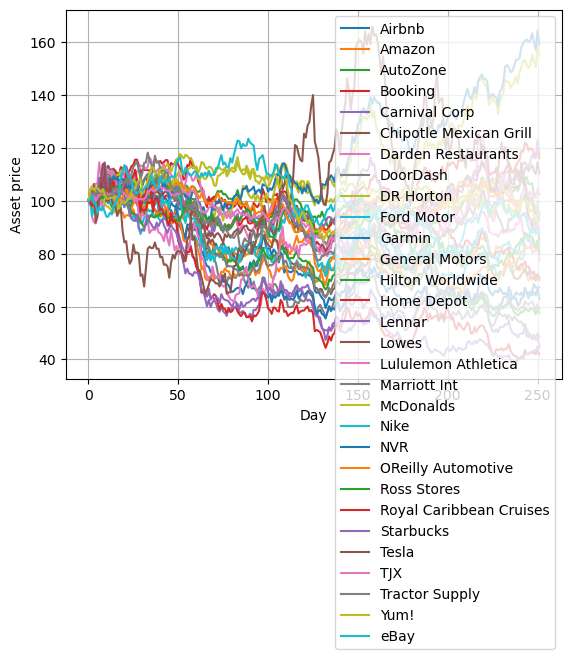

In [67]:
# Plot simulated price paths
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
array_day_plot = [t for t in range(T)]
tickers = xly.columns

for n in range(Num):
    ax.plot(array_day_plot, stock_price_array[n], label="{}".format(tickers[n]))

plt.grid()
plt.xlabel("Day")
plt.ylabel("Asset price")
plt.legend(loc="best")

plt.show()